## ``PYTHON二维地震数据(SEGY)可视化``

## 1.导入库

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
import segyio
%config InlineBackend.figure_format='svg'
import pandas as pd 
# from mayavi import mlab

>> 2.1显示segy道头

标准SEG-Y文件一般包括三部分，第一部分是EBCDIC文件头（3200字节），由40个卡组成（例如：每行80个字符*40行），用来保存一些对地震数据体进行描述的信息；第二部分是二进制文件头（400字节）用来存储描述SEG-Y文件的一些关键信息，包括SEG-Y文件的数据格式、采样点数、采样间隔、测量单位等一些信息，这些信息一般存储在二进制文件头的固定位置上；第三部分是实际的地震道，每条地震道都包含240字节的道头信息和地震道数据。

[SEGY]https://baike.baidu.com/item/SEGY/7587030?fr=aladdin

In [7]:
with segyio.open("D:/code/Python Code/data/SEGY/viking_small.segy", ignore_geometry=True) as f:    
    h1 = f.text[0]  # f.text[0]文件头第一部分
    h2 = f.bin  #需要转换为ASCII码后才能显示
    h3 = f.header
    nSamples = f.bin[segyio.BinField.Samples] #  数据道采样点数。
    nTraces = f.bin[segyio.BinField.Traces]  # 每个道集的数据道数
    nInterval = f.bin[segyio.BinField.Interval]  #  微秒（us）形式的采样间隔
    nSortingCode = f.bin[segyio.BinField.SortingCode] # 道分选码（即集合类型）
    nFormat = f.bin[segyio.BinField.Format]  # 数据采样格式编码
print(type(h1))  # 字节数组
print(type(h2))
print(len(h1))#3600字节
print(h2)
print(len(h2))

print(type(h3))
print(nSamples) 
print(nTraces)
print(nInterval)
print(nSortingCode)
print(nFormat)

<class 'bytearray'>
<class 'segyio.field.Field'>
3200
{JobID: 9999, LineNumber: 9999, ReelNumber: 1, Traces: 480, AuxTraces: 0, Interval: 4000, IntervalOriginal: 4000, Samples: 600, SamplesOriginal: 1500, Format: 1, EnsembleFold: 0, SortingCode: 1, VerticalSum: 1, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, Sweep: 0, SweepChannel: 0, SweepTaperStart: 0, SweepTaperEnd: 0, Taper: 0, CorrelatedTraces: 2, BinaryGainRecovery: 1, AmplitudeRecovery: 4, MeasurementSystem: 1, ImpulseSignalPolarity: 1, VibratoryPolarity: 0, ExtAuxTraces: 0, ExtSamples: 0, ExtSamplesOriginal: 0, ExtEnsembleFold: 0, SEGYRevision: 0, SEGYRevisionMinor: 0, TraceFlag: 0, ExtendedHeaders: 0}
35
<class 'segyio.trace.Header'>
600
480
4000
1
1


显示数据道道头

In [4]:
with segyio.open("D:/code/Python Code/data/SEGY/viking_small.segy", ignore_geometry = True) as f:
    traces_numbers = f.tracecount  # 获取地震道数
    # 道头关键字
    headers = segyio.tracefield.keys
    # index行编号，从1开始计数；columns是列，各列名称是道头信息
    df = pd.DataFrame(index=range(1, traces_numbers + 1),
                        columns=headers.keys())
    # 将信息写入表中
    for k, v in headers.items():
        df[k] = f.attributes(v)[:]
df.head()

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2
1,1,1,3,1,101,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2,3,2,101,2,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,3,3,3,101,3,3,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,4,3,4,101,4,4,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,5,5,3,5,101,5,5,1,0,1,...,0,0,0,0,0,0,0,0,0,0


## 二维数据显示

In [5]:

def READSEGYData(filename):
    print("///reading segy-formatted seismis data:")
    print(f'data file-->[{filename}]')
    
    with segyio.open(filename,'r',ignore_geometry=True) as f:
        f.mmap()# mmap方法可以加速数据读取
        nTrace=f.tracecount
        nSample=f.bin[segyio.BinField.Samples]
        startT=0
        deltaT=f.bin[segyio.BinField.Interval]
        print(f'number of trace ={nTrace}')
        print(f'number of samples ={nSample}')
        print(f'start samples ={startT}')
        print(f'sampling rate ={deltaT}')
        data2D=np.asarray([np.copy(x) for x in f.trace[:]]).T
    my_data=[data2D,nTrace,nSample,startT,deltaT]
    f.close()
    return my_data
data2D='D:/code/Python Code/data/SEGY/viking_small.segy'
my_data=READSEGYData(data2D)
data2D=my_data[0]
print('数据体shape:',data2D.shape)
#原始数据提取完成
clip=5
vmin,vmax=-clip,clip
# plt.figure('1',facecolor='lightgrey')#彩色图像
# plt.imshow(data2D[0:my_data[2],0:1000],cmap=plt.cm.seismic,
#             interpolation='nearest',aspect=1,vmin=vmin,vmax=vmax)
# plt.xlabel('Trace number')
# plt.ylabel('Time sample')
# plt.title('SEGY_data')

# plt.savefig('D:/code/Python Code/data/picture/1.jpg',dpi=800,bbox_inches='tight')#保存清晰

# plt.figure('2')#灰色图像
# plt.imshow(data2D[0:my_data[2],0:1000],cmap=plt.cm.bone,#my_data[1]是显示1比1，my_data[2]显示全部数据
#             interpolation='nearest',aspect=1,vmin=vmin,vmax=vmax)
# plt.xlabel('Trace number')
# plt.ylabel('Time sample')

# plt.figure('3')#灰度图像
# plt.imshow(data2D[0:my_data[2],0:480],cmap='Greys',
#             interpolation='nearest',aspect=1,vmin=vmin,vmax=vmax)
# plt.xlabel('Trace number')
# plt.ylabel('Time sample')

# plt.show()


///reading segy-formatted seismis data:
data file-->[D:/code/Python Code/data/SEGY/viking_small.segy]
number of trace =480
number of samples =600
start samples =0
sampling rate =4000
数据体shape: (600, 480)


segy地震数据波形可视化

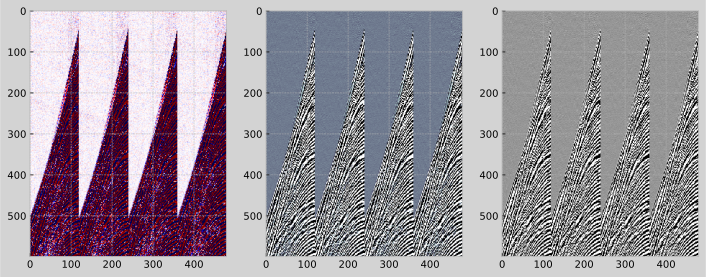

In [6]:
fig,axs=plt.subplots(1,3,figsize=(12,12),facecolor='lightgrey')

axs[0].imshow(data2D[0:my_data[2],0:1000],cmap=plt.cm.seismic,interpolation='nearest',aspect=1,vmin=vmin,vmax=vmax)
axs[1].imshow(data2D[0:my_data[2],0:1000],cmap=plt.cm.bone,interpolation='nearest',aspect=1,vmin=vmin,vmax=vmax)
axs[2].imshow(data2D[0:my_data[2],0:1000],cmap='Greys',interpolation='nearest',aspect=1,vmin=vmin,vmax=vmax)
plt.show()

输出一道地震记录

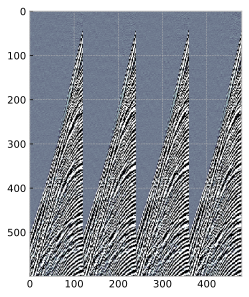

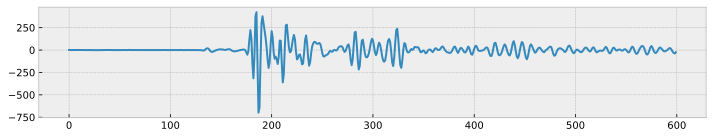

In [7]:
plt.imshow(data2D[0:my_data[2],:],cmap=plt.cm.bone,#my_data[1]是显示1比1，my_data[2]显示全部数据
            interpolation='nearest',aspect=1,vmin=vmin,vmax=vmax)

data2=data2D[0:my_data[2],99]#时间序列/地震道
t=np.arange(0,my_data[2])
fig2,axs=plt.subplots(figsize=(12,2))
axs.plot(t,data2)
plt.show()

在pandas
中打开数据

In [8]:
import pandas  as pd 

data=data2D[0:my_data[2],:]
data=pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,...,470,471,472,473,474,475,476,477,478,479
0,0.027187,-0.551446,-0.815270,0.165831,0.352960,-0.554114,-0.387597,-0.064327,0.036977,0.317447,...,0.292531,-0.320660,1.113405,0.507617,0.339218,1.049892,0.447788,0.781522,0.066860,2.102356
1,-0.282619,-0.057005,0.081636,-0.126181,-0.281004,-0.152575,-0.178015,-0.111546,0.179774,0.080000,...,0.405073,-0.370107,1.506701,0.075904,0.150759,0.246568,0.434173,0.706048,0.441324,1.610313
2,0.290552,0.819352,0.190664,-0.859691,-0.534513,0.253706,-0.077162,-0.290094,-0.045852,-0.256403,...,0.553689,-0.091445,0.292240,-0.193411,0.516832,-0.779618,-0.157395,0.325521,0.399766,-0.034264
3,0.526571,0.372815,-0.445827,-0.564243,-0.143541,-0.115133,-0.212523,-0.224170,0.014508,-0.126602,...,-0.046900,0.105003,-0.818909,-0.125014,0.623126,-0.455665,-0.052914,0.071726,-0.087569,-0.379940
4,-0.030275,-0.167865,-0.082298,0.478821,0.259228,-0.370183,-0.202743,-0.166729,-0.103272,0.008745,...,-0.610402,0.774834,-0.310822,0.545826,-0.181423,0.008411,-0.014989,-0.567457,0.180488,0.877547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,78.125854,17.696411,11.626160,-52.465759,-75.712524,36.633667,23.244019,3.060959,-0.330016,-19.836731,...,30.701355,32.633789,29.135681,23.914032,21.620667,16.216187,12.995682,6.913940,0.776391,0.574533
596,69.141357,-8.164047,-30.900238,-38.946594,-42.389160,29.488068,11.096329,15.391129,0.242486,-39.566223,...,33.410522,27.160065,22.642151,15.182587,8.451538,1.587872,0.048447,-5.711037,-7.927315,-18.558075
597,48.936218,-16.284058,-68.821289,-48.583435,3.652927,24.930969,5.827553,23.553192,-8.296509,-48.109924,...,17.546722,9.405670,7.877563,1.062332,-8.220123,-15.575699,-20.216858,-20.060883,-17.090942,-25.703156
598,19.366119,-8.119736,-74.140381,-76.322876,30.629974,24.857574,6.302231,16.925446,-19.613922,-44.471191,...,-2.212326,-7.519775,-8.110046,-12.840210,-16.681122,-18.995911,-22.920227,-19.170441,-18.548309,-15.814484


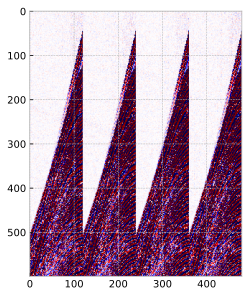

In [9]:
clip=10
vmin,vmax=-clip,clip#图像显示范围
plt.imshow(data,cmap=plt.cm.seismic,interpolation='nearest',aspect=1,vmin=vmin,vmax=vmax)
plt.show()

## 三维数据
---

数据类型： <class 'numpy.ndarray'>
shape: (201, 201, 51)


Text(0, 0.5, 'Time sample')

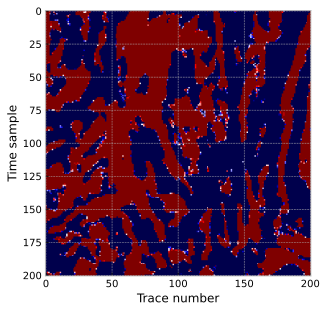

In [10]:
filen3D = 'D:/code/Python Code/data/SEGY/F3_Dip_steered_median_subvolume_IL230-430_XL475-675_T1600-1800.sgy'
data3D = segyio.tools.cube(filen3D)
print('数据类型：',type(data3D))
print('shape:',data3D.shape)

clip = 1e+2   # 显示范围，负值越大越明显
vmin, vmax = -clip, clip
# 彩色图像# 纵横比为 0.5   29760
plt.imshow(data3D[:,:,50], cmap=plt.cm.seismic,
            interpolation='nearest', aspect=1, vmin=vmin, vmax=vmax)
plt.xlabel('Trace number')
plt.ylabel('Time sample')


In [11]:
print(type(data3D))

<class 'numpy.ndarray'>


显示切片数据

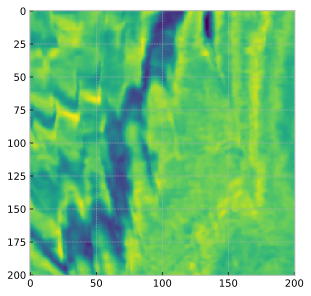

In [16]:
plt.imshow(data3D[:,:,0],interpolation='nearest')

mayavi中实现三维数据可视化

In [14]:

mlab.contour3d(data3D)
mlab.show()